# Home Assignment No. 2

To solve this task, you will write a lot of code to try several deep learning approaches.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [pytorch](https://pytorch.org/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `pytorch` and `torchvision` libraries instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed`, i.e., to use `torch.manual_seed(...)` and `np.random.seed(...)`.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Remember to use **GPU** computations in `pytorch`. For this, you have to write `model.cuda()`, `tensor.cuda()` to put your model/tensor to GPU. If you do not want to have an easy life, you may compute everything on **CPU** (default).

* If you have **multiple** GPUs available, you may call `torch.cuda.set_device(DEVICE_ID)` to specify the particular  GPU device to be used. Also, you are allowed to use `torch.nn.DataParallel(...)` to compute on multiple GPUs but a **single Google Colab GPU is enough for each task**.


## Task 1. Toy Deep Learning. (3 points)

-  **(1 pt.)** Activation functions; **(subtask 1.1)**
-  **(2 pt.)** MNIST classification.  **(subtask 1.2)**



### Subproblem 1.1  Activation functions.
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch implementation and their derivatives using [autograd](https://pytorch.org/docs/stable/autograd.html) functionality `grad()`:
   
**1.1.1) Plot `ReLU`, `ELU` ($\alpha = 1$), `Softplus` ($\beta = 1$) and `Sign`, `Sigmoid`, `Softsign`, `Tanh`.**


EXPECTED OUTPUT FORMAT


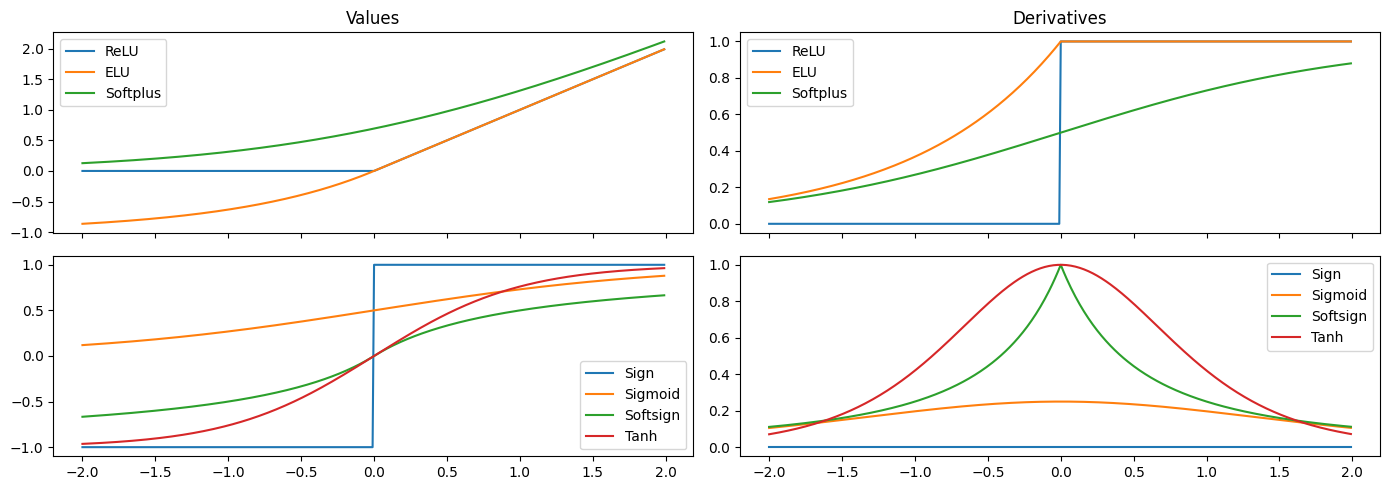

In [ ]:
%matplotlib inline
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch
x = torch.arange(-2, 2, .01, requires_grad=True)
x_np = x.detach().numpy()
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(14, 5))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

names = []

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution (do not delete this comment)
        axes[i, 0].plot(x.detach().numpy(), activation(x).detach().numpy(), label=function_name)
        x.grad.zero_()
        activation(x).sum().backward()
        axes[i, 1].plot(x.detach().numpy(), x.grad.detach().numpy(), label=function_name)
        ### END Solution (do not delete this comment)

    axes[i, 0].legend()
    axes[i, 1].legend()
print('EXPECTED OUTPUT FORMAT')
plt.tight_layout()
plt.show()

**1.1.2) Which of these functions may be, and which - definitely, are a poor choise as an activation function in a neural network? Why? Do not forget that output of the current layer servers as an input for the following one. Imagine a situation where we have many layers, what happens with the activation values?**







**Your text answer (do not delete this comment)**:

ReLU <write your answer>ReLU (Rectified Linear Unit):
$[
\text{ReLU}(x) = \max(0, x)
]$
selecting ReLu as activation function is good .since it reduce vanishing gradient and introduce sparsity in NN. on the other hand,in many layer neural network, it may be suffering Relu dying problem where some neuron become in active.This result in dead gradients.
    

ELU <write your answer> This activation helps to overcome dying Relu problem. since it allows negative values.it smooth the transition and avoid the discontinuity of Relu. this leads to gradient flow.
   $[
\text{ELU}(x) = \begin{cases} x & \text{if } x \geq 0 \\ \alpha(\exp(x) - 1) & \text{otherwise} \end{cases}
]$

Softplus <write your answer> most of the time, softplus is not good choice activation function. this is because of zero centerdness.it has vanishing gradient problem. specifically in many layer neural network.it has also problem of not clamping output values. This leads to gradient exploding.
    $[
\text{Softplus}(x) = \log(1 + e^x)
]$

    
Sign <write your answer> this activation function has problem of resulting in non differntiable point, Due to this ,gradient optimizer become unstable.it is also slow compared to othe activation function.
    $[
\text{Sign}(x) = \begin{cases} -1 & \text{if } x < 0 \\ 0 & \text{if } x = 0 \\ 1 & \text{if } x > 0 \end{cases}
]$

    
Sigmoid <write your answer> sigmoid is also not good in many layer neural network.it has the problem of vanishing gradient.it is obvious that sigmoid activation function saturates at extrem point.so in many layer neural network, it slow down learning.
$[
\sigma(x) = \frac{1}{1 + e^{-x}}
]$
    
Tanh <write your answer> this activation function has also problem of vanishing gradient.specifically in many layer neural network. it has zero centerdness property.This reduce gradient problem when we compare to sgmoid activation function.
    $[
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
]$

### Task 1.2 MNIST classification.

At one of the seminars we have discussed an MLP (Multilayer perceptron) with one hidden layer, logistic activation functions and softmax. In this task, you will need to:

1. Implement the MLP modules, including the Softmax cross entropy between `logits` and `labels` using numpy.

2.  Train your numpy realization of MLP to classify MNIST from `sklearn.datasets()`. The required accuracy on validation is `> 90%`.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

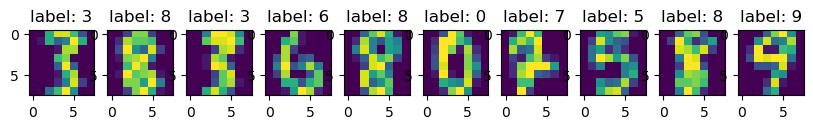

In [ ]:
N = 10

sample_idx = np.random.choice(1797, N, replace=False)
digits_sample = digits[sample_idx]
targets_sample = targets[sample_idx]
f, ax  = plt.subplots(1,10, figsize=(10, 5))

for i in range(N):
    ax[i].imshow(digits_sample[i].reshape(8,8))
    ax[i].set_title('label: '+str(targets_sample[i]))


A short recap on what we are going to achieve here.
<br>
1. Forward pass:
$$
h_1 = X\theta_1+\beta_1
$$

$$
O_1 = sig(h_1)
$$

$$
h_2 = O_1\theta_2+\beta_2
$$
$$
O_2 = softmax(h_2)
$$
$$
Loss = CrossEntropy(O_2, true \space labels)
$$

2. Compute gradients:

To update weights first we need to compute loss gradients with respect to $\theta_1$ and $\theta_2$ and then update both $\theta$ and $\beta$.

$$
\frac{ \partial{loss} }{\partial{\theta_2}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{\theta_2}}
$$
Note, that $\frac{ \partial{h_2} }{\partial{\theta_2}}=O_1$, so we can cache this value during forward pass to speed up our computation.
$$
\frac{ \partial{loss} }{\partial{\theta_1}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{O_1}}\frac{ \partial{O_1} }{\partial{h_1}}\frac{ \partial{h_1} }{\partial{\theta_1}}
$$
Note, that $\frac{ \partial{h_1} }{\partial{\theta_1}}=X$.

Since we are using sigmoid avtivation function here and
$$
\frac{ \partial{sig} }{\partial{h}} = sig(h)(1 - sig(h))
$$
It also makes sense to cache sig(h) during forward pass.

3. Update weights:

$\theta:= \theta -  \frac{ \partial{loss} }{\partial{\theta}}\alpha$, where $\alpha$ is some learning rate.

Note, it was not shown here how to update and compute $\beta$ but you can do it!

**1.2.1) Implement the MLP with backprop**

Here you should implement an MLP class and its constituents including forward and backward propagation methods.

In [ ]:
class Linear:
    def __init__(self, input_size, output_size):
        # Trainable parameters of the layer and their gradients
        self.thetas = np.random.randn(input_size, output_size) # the weight matrix of the layer (W)
        self.thetas_grads = np.empty_like(self.thetas) # gradient w.r.t. the weight matrix of the layer
        self.bias = np.random.randn(output_size) # bias terms of the layer (b)
        self.bias_grads = np.empty_like(self.bias) # gradient w.r.t. bias terms of the linear layer

    def forward(self, x):
        # keep x for backward computation
        self.x = x
        output = np.matmul(x, self.thetas) + self.bias
        return output

    def backward(self, output_grad, learning_rate):
        """
        Calculate and return gradient of the loss w.r.t. the input of linear layer given the input x and the gradient
        w.r.t output of linear layer. You should also calculate and update gradients of layer parameters.
        :param x: np.array, input tensor for linear layer;
        :param output_grad: np.array, grad tensor w.r.t output of linear layer;
        :return: np.array, grad w.r.t input of linear layer
        """

        ### BEGIN Solution (do not delete this comment)
        #update the gradients
        input_grad = output_grad @ self.thetas.T
        self.thetas_grads = self.x.T @ output_grad
        self.bias_grads = np.sum(output_grad, axis=1)

        # updating weights and biases
        self.thetas -= self.thetas_grads * learning_rate
        self.bias -= self.bias_grads * learning_rate

        ### END Solution (do not delete this comment!)

        return input_grad

    def step(self, learning_rate):
        self.thetas -= self.thetas_grads * learning_rate
        self.bias -= self.bias_grads * learning_rate

class LogisticActivation:
    def __init__(self):
        # the layer has no parameters
        pass

    def sig(self, x):
        return 1/(1 + np.exp(-x))

    def forward(self, x):
        # keep o for backward computation
        self.o = self.sig(x)
        return self.o


    def backward(self,  output_grad, learning_rate=None):
        """
        Calculate and return the gradient of the loss w.r.t. the input
        of logistic non-linearity (given input x and the gradient
        w.r.t output of logistic non-linearity).

        :param x: np.array, input tensor for logistic non-linearity;
        :param output_grad: np.array, grad tensor w.r.t output of logistic non-linearity;
        :return: np.array, grad w.r.t input of logistic non-linearity

        """

        ### BEGIN Solution (do not delete this comment!)
        # calculating input gradient using output_gradient
        input_grad = self.o * (1 - self.o) * output_grad

        ### END Solution (do not delete this comment!)

        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)

    def forward(self, x):
        h1 = self.linear1.forward(x)
        h1a = self.activation1.forward(h1)
        out = self.linear2.forward(h1a)
        return out

    def backward(self, output_grad, learning_rate):
        """
        Calculate and return the gradient of the loss w.r.t. the input of MLP given the input and the gradient
        w.r.t output of MLP. You should also update gradients of paramerters of MLP layers.
        Hint - you should chain backward operations of modules you have already implemented. You may also
        need to calculate intermediate forward results.

        :param x: np.array, input tensor for MLP;
        :param output_grad: np.array, grad tensor w.r.t output of MLP;
        :return: np.array, grad w.r.t input of MLP
        """

        ### BEGIN Solution (do not delete this comment!)
        #back ward pass through neural network layers
        y2  = self.linear2.backward(output_grad, learning_rate)
        y1  = self.activation1.backward(y2)
        out = self.linear1.backward(y1, learning_rate)
        ### END Solution (do not delete this comment!)


        return  out


In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):

    ### BEGIN Solution (do not delete this comment!)
    #create one hote encoded labels

    labels_ = np.zeros_like(logits)
    labels_[np.arange(logits.shape[0]), reference_answers] = 1
    #calculate softmax  probabilities
    softmax_proba = np.exp(logits) / np.sum(np.exp(logits), axis=1).reshape(-1, 1)
    # calculate cross entropy loss
    loss = np.sum(-labels_ * np.log(softmax_proba), axis=1).mean()
    ### END Solution (do not delete this comment!)

    return loss

def grad_softmax_crossentropy_with_logits(logits, reference_answers):

    ### BEGIN Solution (do not delete this comment!)
    #create one_hote encoded labels
    labels_ = np.zeros_like(logits)
    labels_[np.arange(logits.shape[0]), reference_answers] = 1
    #calculate gradient ofsoftmax cross-enropy loss
    grad = np.exp(logits) / np.sum(np.exp(logits))-labels_
    ### END Solution (do not delete this comment!)

    return grad

In [ ]:
np.random.seed(42)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 100
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-2

for epoch in range(epochs_n):

    y_pred = []

    for sample_i in range(train_size):
        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])
        logits = mlp.forward(x)

        ### BEGIN Solution (do not delete this comment!)

        # ... perform forward pass and compute the loss
        # ... compute the gradients w.r.t. the input of softmax layer
        # ... perform backward pass
        # ... and update the weights with weight -= grad * learning_rate

         # ... perform forward pass and compute the loss
        loss = np.mean(softmax_crossentropy_with_logits(logits, target))

        # ... compute the gradients w.r.t. the input of softmax layer
        loss_grad = grad_softmax_crossentropy_with_logits(logits, target)

        # ... perform backward pass and update the weights with weight -= grad * learning_rate
        mlp.backward(loss_grad, learning_rate) # weights updated inside backward


        ### END Solution (do not delete this comment!)

        y_pred.extend(logits.argmax(1))

    if epoch % 10 == 0:

        y_pred_test = []

        for sample_i in range(test_size):
            x = x_test[sample_i].reshape((1, -1))
            target = np.array([y_test[sample_i]])

            logits = mlp.forward(x)
            y_pred_test.extend(logits.argmax(1))

        print('Starting epoch {}'.format(epoch), \
              ', Loss : {:.3}'.format(loss), \
              ', Accuracy on train: {:.3}'.format(accuracy_score(y_train, y_pred)), \
              ', Accuracy on test: {:.3}'.format(accuracy_score(y_test, y_pred_test)) )

Starting epoch 0 , Loss : 2.49 , Accuracy on train: 0.0943 , Accuracy on test: 0.111
Starting epoch 10 , Loss : 2.24 , Accuracy on train: 0.594 , Accuracy on test: 0.64
Starting epoch 20 , Loss : 1.74 , Accuracy on train: 0.813 , Accuracy on test: 0.807
Starting epoch 30 , Loss : 1.26 , Accuracy on train: 0.868 , Accuracy on test: 0.86
Starting epoch 40 , Loss : 0.893 , Accuracy on train: 0.895 , Accuracy on test: 0.884
Starting epoch 50 , Loss : 0.643 , Accuracy on train: 0.906 , Accuracy on test: 0.909
Starting epoch 60 , Loss : 0.475 , Accuracy on train: 0.917 , Accuracy on test: 0.92
Starting epoch 70 , Loss : 0.361 , Accuracy on train: 0.926 , Accuracy on test: 0.922
Starting epoch 80 , Loss : 0.281 , Accuracy on train: 0.929 , Accuracy on test: 0.924
Starting epoch 90 , Loss : 0.224 , Accuracy on train: 0.935 , Accuracy on test: 0.924


**1.2.2) Print the confusion matrix between your predictions and true values.**

In [ ]:
# BEGIN Solution (do not delete this comment!)

confusion_matrix(y_test, y_pred_test)

# END Solution (do not delete this comment!)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  2,  0,  0,  3],
       [ 1,  2, 39,  1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  2, 40,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  4],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  4,  1,  0,  0,  1,  0,  1, 40,  1],
       [ 0,  0,  0,  2,  0,  2,  0,  0,  1, 42]], dtype=int64)

## Task 2. CIFAR-10 Classification (10 points)
**From now on we will be using pytorch for all the tasks.**

We will create a 10-class classifier on the popular [CIFAR-10](https://pytorch.org/vision/stable/datasets.html#cifar) dataset.

1. **(1 pt.)**  Load the dataset. Prepare dataloaders (train, test). Visualize images. (**Subproblem 2.1**)

2. **(2 pt.)**  Prepare the training procedure. Train a simple linear classifier `clf_lr`. (**Subproblem 2.2**)

3. **(2 pt.)**  Define, train and evaluate a sequential fully-connected classifier `clf_mlp`. (**Subproblem 2.3**)

4. **(3 pt.)**  Define, train and evaluate a convolutional + fully-connected classifier `clf_cnn`. (**Subproblem 2.4**)

5. **(2 pt.)**  Define, train and evaluate a deep neural network classifier `clf` from [torchvision.models](https://pytorch.org/vision/stable/models.html). (**Subproblem 2.5**)

To get points for subtasks 3-5, it is **mandatory** to succesfully complete preparation subtasks 1, 2.

In [ ]:
### BEGIN Solution (do not delete this comment!)

# >>> your imports here <<<

import torch
import torchvision.transforms as transforms
from torchvision import datasets
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
from torch import nn
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
torch.manual_seed(42);
torch.cuda.manual_seed(42)
import warnings
warnings.filterwarnings("ignore")
### END Solution (do not delete this comment!)

### Subproblems 2.1. Dataloaders.

<img width=350 src="https://ak.picdn.net/shutterstock/videos/1039407446/thumb/1.jpg">

**2.1.1) Here you have to load CIFAR-10 dataset. For this, you have to**
1. Create two composite [transform](https://pytorch.org/vision/stable/transforms.html#compositions-of-transforms) operations (`train_transform`, `test_transform`) to augment/normalize the data (random crops, rotations, etc.):
- On the train set, you are free to compose any transforms you want. It is not mandatory to use any transforms (except for `ToTensor`), but without proper data augmentation you will probably struggle to train classifier in the following tasks.
- On the test set, we may use only `Normalization` and `ToTensor`. If you use normalization, make sure it is the same on both train and test parts.
2. Load the train and test parts (`train_set`, `test_set`) of the [CIFAR-10 dataset](https://pytorch.org/vision/stable/datasets.html#cifar) which use the transforms that you prepared.
3. Prepare train and test [dataloaders](https://pytorch.org/docs/stable/data.html) (`train_loader`, `test_loader`) which load the respective datasets. Use some batch size $\in[8, 128]$.

In [ ]:
### BEGIN Solution (do not delete this comment)
'''define transformation
# This is the two-step process used to prepare the
# First step is to convert Python Image Library (PIL) format
 to PyTorch tensors,data augmentation using horizontal flip, random clip,  normalization.
# Second step is used to normalize the data by specifying a
 mean and standard deviation for each of the three channels.
# This will convert the data from [0,1] to [-1,1]
# Normalization of data should help speed up conversion and
# reduce the chance of vanishing gradients with certain
# activation functions.'''
num_workers=2
batch_size_for_train_loader=128
batch_size_for_test_loader=100
mean=[0.5, 0.5, 0.5]
standard_deviation=[0.5, 0.5, 0.5]
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomCrop(32,padding=2),
                                      transforms.ToTensor(), transforms.Normalize(mean, standard_deviation)])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean,
                                                          standard_deviation)])

train_set = datasets.CIFAR10(root='./data', train=True, download=True,
                            transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size_for_train_loader,
                                          shuffle=True, num_workers=num_workers)

test_set = datasets.CIFAR10(root='./data', train=False,
                            download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size_for_test_loader,
                                         shuffle=False, num_workers=num_workers)

### END Solution (do not delete this comment)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Train size', len(train_set))
print('Test size', len(test_set))

100%|██████████| 170498071/170498071 [00:02<00:00, 78443644.82it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train size 50000
Test size 10000


**2.1.2) Now write a function** which takes a dataloader and plots a **random batch** of images with their **true labels**. If the pre-processing in your dataloaders contains normalization, you **must** perform inverse normalization in order to make the colors look natural. You also have to remove the ticks/labels of axes from each subplot and assign a title to each subplot based on the image's class. Visualizing images helps to check that the preprocessing you do is meaningful.

In [ ]:
def plot_random_images(loader):
    # BEGIN Solution (do not delete this comment!)

    images, labels = next(iter(loader))

    # Unnormalize images
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    images = images.numpy() * std.reshape((1, 3, 1, 1)) + mean.reshape((1, 3, 1, 1))
    images = np.clip(images, 0, 1)

    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        # Display image
        ax.imshow(np.transpose(images[i], (1, 2, 0)))
        ax.set_title(classes[labels[i]])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


    # END Solution (do not delete this comment!)

**2.1.3) Plot random train and test images.**

Train (augmented) images.


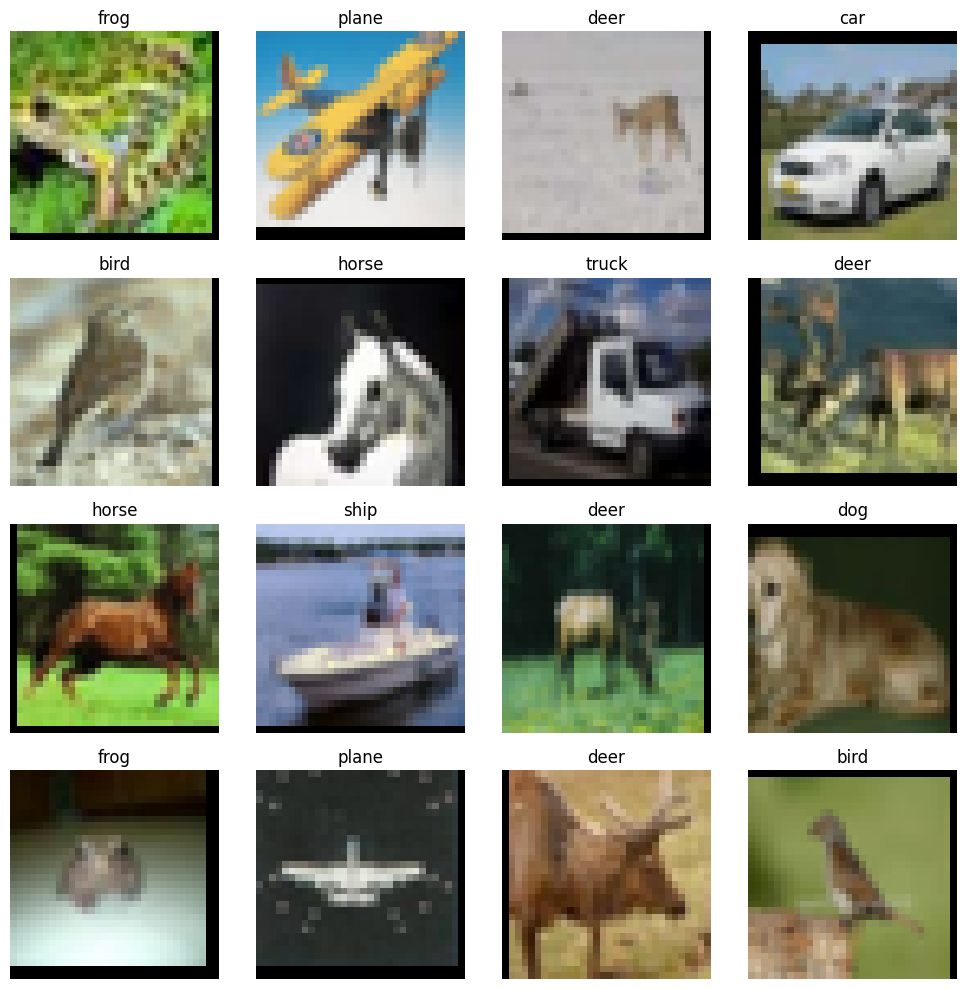

In [ ]:
print('Train (augmented) images.')
plot_random_images(train_loader)

Test images (no augmentation).


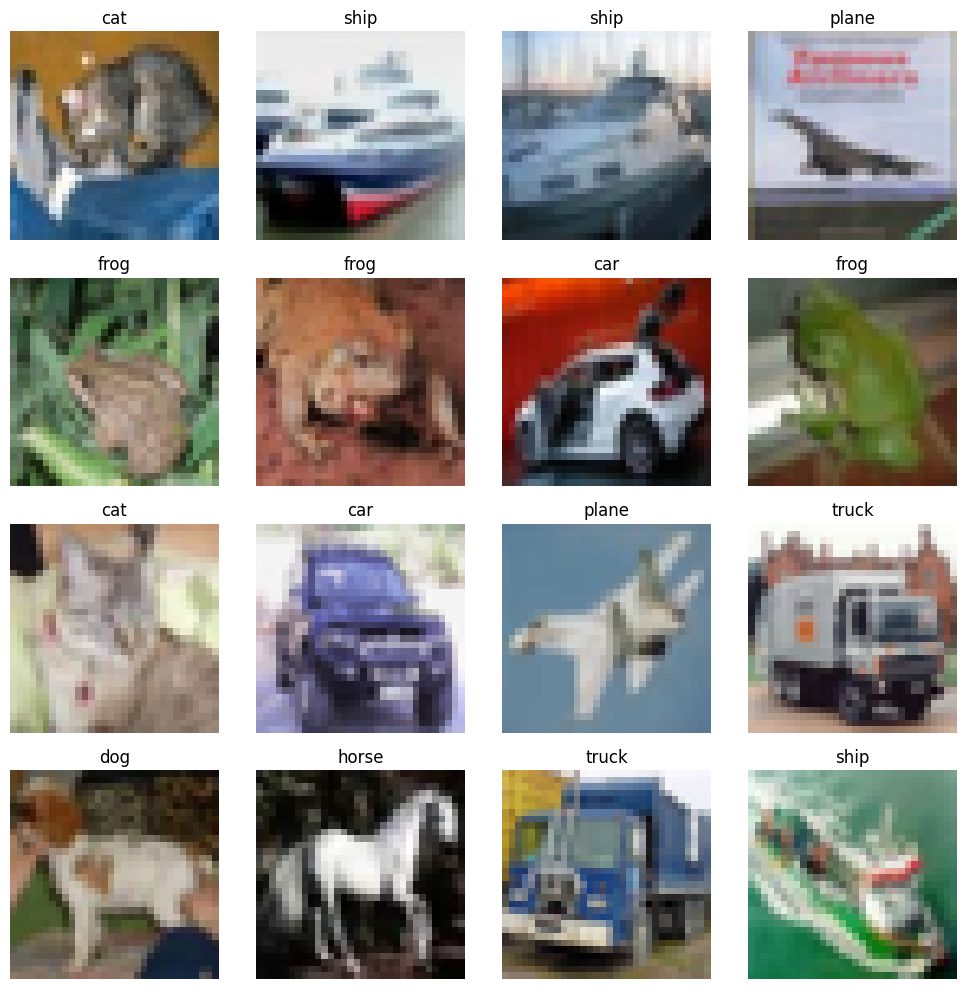

In [ ]:
print('Test images (no augmentation).')
plot_random_images(test_loader)

### Subtask 2.2. Training procedure + linear classification ($\geq$38%)
**2.2.1) Now we are ready to write the code for training & evaluation. You have to prepare 2 following procedures:**
1. `epoch_train` has to perform 1 training epoch. It should iterate the given `loader`. For each batch it should compute the loss of the `clf` model by `criterion` and perform the gradient step by using the model optimizer `opt`. The function should return **2 values** -- average loss on batches during training and average accuracy of prediction.
2. `epoch_test` has to perform 1 evaluation epoch. It should do the same as `epoch_train` but without performing optimization of `clf` model.

At the beginning of `epoch_train` and `epoch_test` it is necessary to call `clf.train(True)` and `clf.eval()` respectively. This will change the behaviour of dropout/batchnorm layers to the one required during the procedure (training/evaluation). For more details, see this [post](https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch).

In [ ]:
def epoch_train(loader, clf, criterion, opt):
    # BEGIN Solution (do not delete this comment!)
    clf.train(True)  # Set model to training mode
    total_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in loader:
        inputs, targets = inputs.cuda(), targets.cuda()

        # Forward pass
        outputs = clf(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        opt.zero_grad()
        loss.backward()
        opt.step()

        # Statistics
        total_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = 100. * correct / total

    return avg_loss, accuracy

    # END Solution (do not delete this comment!)

def epoch_test(loader, clf, criterion):
    # BEGIN Solution (do not delete this comment!)

    clf.eval()  # Set model to evaluation mode
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.cuda(), targets.cuda()

            # Forward pass
            outputs = clf(inputs)
            loss = criterion(outputs, targets)

            # Statistics
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = 100. * correct / total

    return avg_loss, accuracy

    # END Solution (do not delete this comment!)

# The function which you are going to use for model training
def train(train_loader, test_loader, clf, criterion, opt, n_epochs=50):
    for epoch in tqdm(range(n_epochs)):
        train_loss, train_acc = epoch_train(train_loader, clf, criterion, opt)
        test_loss, test_acc = epoch_test(test_loader, clf, criterion)

        print(f'[Epoch {epoch + 1}] train loss: {train_loss:.3f}; train acc: {train_acc:.2f}; ' +
              f'test loss: {test_loss:.3f}; test acc: {test_acc:.2f}')

Below we define a simple linear classifier which can be used to test the code above.

In [ ]:
class LINEAR(nn.Module):
    def __init__(self, num_classes=10):
        super(LINEAR, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, num_classes)
        )

    def forward(self, x):
        return self.layers(x).cuda()

clf_lr = LINEAR(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_lr.parameters()]))

Number of weights: 30730


**2.2.2) Define the optimizer (use [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)) and the training criterion. As the training criterion for classification, please use the [CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).**

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<
import torch.optim as optim
opt = optim.SGD(clf_lr.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()
# END Solution (do not delete this comment!)

Now train your linear classifier. It is mandatory to achieve the **final test accuracy $\geq$38%**. If you do not achieve this accuracy, try changing optimizer parameters (learning rate, momentum, weight decay), train data augmentation (subtask 8.1), batch size, number of training epochs.

In [ ]:
train(train_loader, test_loader, clf_lr, criterion, opt, n_epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

[Epoch 1] train loss: 1.927; train acc: 32.08; test loss: 1.834; test acc: 36.43
[Epoch 2] train loss: 1.841; train acc: 36.03; test loss: 1.806; test acc: 37.41
[Epoch 3] train loss: 1.820; train acc: 36.72; test loss: 1.789; test acc: 37.62
[Epoch 4] train loss: 1.811; train acc: 37.26; test loss: 1.779; test acc: 38.64
[Epoch 5] train loss: 1.801; train acc: 37.85; test loss: 1.767; test acc: 39.16
[Epoch 6] train loss: 1.797; train acc: 37.67; test loss: 1.765; test acc: 39.60
[Epoch 7] train loss: 1.794; train acc: 37.93; test loss: 1.764; test acc: 38.91
[Epoch 8] train loss: 1.790; train acc: 37.93; test loss: 1.758; test acc: 39.00
[Epoch 9] train loss: 1.787; train acc: 38.41; test loss: 1.750; test acc: 39.69
[Epoch 10] train loss: 1.787; train acc: 38.24; test loss: 1.750; test acc: 39.42


**2.2.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:**

\<write your answer\>
The architecture is already given , which is simple linear classifier.it has one fully connected layer.When we see the optimizer,Stochastic gradient  optimizer is used. When i tune , learning rate   and momentum , it has impact on accuracy of the model.Data augmentation such as horizonatal flipping , random crop ,and  normalization  has contribution on the accuracy of the model.
Besides to this, changing the number of epoches also put influence on the accuracy. As the result, the most important change that help me to achieve desired accuracy is changing momentum and learning rate as well as changing the number of epoches.

### Subtask 2.3. Fully-connected classifier  ($\geq$63%)
**2.3.1)** Linear classifiers are doomed to provide poor performance on most image datasets. We make a step further and define a **multilayer perceptron** to classify CIFAR-10 images. You have to build a **sequential fully-connected network** satisfying the following requirements:
1. $\geq 2$ hidden fully-connected (linear) layers;
2. The network has ReLU activations;
3. There is $\geq 1$ Dropout layer in network;
4. There is $\geq 1$ BatchNorm1d layer layer in network;

**A toy image** of a fully-connected neural network.

<img width=450 src="https://www.researchgate.net/profile/Vikas-Ramachandra-2/publication/323467511/figure/fig3/AS:599172503834624@1519865265479/Figure-A-general-fully-connected-DNN-for-classification.png">

Note your network's input shape is `BATCH_SIZE x 3 x 32 x 32`, so you have to reshape the input tensor before feeding it to fully-connected layers. This can be done manually during `.forward()` or you may use `Flatten()` layer for this.

In [ ]:
class MLP(nn.Module):
    def __init__(self, num_classes=10):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)
            nn.Flatten(),             # Flatten the input tensor
            nn.Linear(3 * 32 * 32, 1024), # First fully connected layer: Input size: 3*32*32, Output size: 1024
            nn.ReLU(),               # ReLU activation
            nn.BatchNorm1d(1024),     # Batch normalization
            nn.Dropout(0.1),         # Dropout layer with probability 0.1
            nn.Linear(1024, 512),     # Second fully connected layer: Input size: 1024, Output size: 512
            nn.ReLU(),               # ReLU activation
            nn.BatchNorm1d(512),     # Batch normalization
            nn.Dropout(0.1),         # Dropout layer with probability 0.1
            nn.Linear(512,num_classes),# Output layer: Input size: 512, Output size: num_classes
            nn.LogSoftmax(dim=-1)
            # END Solution (do not delete this comment!)
        )

    def forward(self, x):
        return self.layers(x)

clf_mlp = MLP(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_mlp.parameters()]))

# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_mlp(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 3679754


**2.3.2) Now define the optimizer, criterion and train the network.** To obtain the points for this task, you must achieve **final test accuracy $\geq$63%**.

If you struggle to achieve this accuracy, try changing the architecture (stack more/less layers, make layers bigger/smaller, add more/less dropout, batchnorm layers), optimizer parameters, train data augmentation (subtask 5.1), batch size, number of training epochs, etc. SGD optimizer might not perform really well, so consider using [more advanced optimizers](https://pytorch.org/docs/stable/optim.html), e.g., `Adam`, `Adamax`, etc. Do not be afraid to stack more layers: it is ok if your net has millions of weights.

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<

# Define the optimizer and loss function
#opt = torch.optim.SGD(clf_mlp.parameters(), lr=0.01, momentum=0.7, weight_decay=5e-16)
opt=torch.optim.Adam(clf_mlp.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()
num_epochs = 100

# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_mlp, criterion, opt, n_epochs=num_epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

[Epoch 1] train loss: 1.705; train acc: 39.35; test loss: 1.503; test acc: 47.05
[Epoch 2] train loss: 1.534; train acc: 45.52; test loss: 1.415; test acc: 50.00
[Epoch 3] train loss: 1.463; train acc: 48.01; test loss: 1.379; test acc: 50.88
[Epoch 4] train loss: 1.413; train acc: 49.71; test loss: 1.331; test acc: 52.72
[Epoch 5] train loss: 1.380; train acc: 50.95; test loss: 1.298; test acc: 53.77
[Epoch 6] train loss: 1.345; train acc: 52.11; test loss: 1.284; test acc: 54.18
[Epoch 7] train loss: 1.322; train acc: 52.92; test loss: 1.271; test acc: 54.86
[Epoch 8] train loss: 1.297; train acc: 53.53; test loss: 1.245; test acc: 55.71
[Epoch 9] train loss: 1.283; train acc: 54.27; test loss: 1.235; test acc: 56.04
[Epoch 10] train loss: 1.265; train acc: 54.93; test loss: 1.226; test acc: 56.29
[Epoch 11] train loss: 1.247; train acc: 55.64; test loss: 1.210; test acc: 56.41
[Epoch 12] train loss: 1.231; train acc: 56.36; test loss: 1.211; test acc: 56.83
[Epoch 13] train loss: 1.

**2.3.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:**


\<write your answer\>
Architecture: I used three fully connected layers in the architecture, and i tried to include a dropout layer to manage overfitting.
and I used batch normalization and the Relu activation function. I tested various optimizers, such as SGD and Adam. but in my case, Adam, with his variable learning rate, helped me achieve the desired accuracy. I augmented the training data set using techniques like random horizontal flipping and cropping. This improved my model's robustness. When we see hyperparameters,  I experiment with different learning rates and momentum. Increasing the number of epoches also helps me get the expected test accuracy.which is greater than or equal to 63 percent.
For this subtask, to achieve the  desired accuracy,it is mandatory  to increase the number of epoch .  i struggled to achieve the expected accuracy with low epoch. which is less than 50 . i did not achieved. But for 100 epoches ,i achieved.

### Subtask 2.4. CNN classifier  ($\geq$80%)
**2.4.1)** Multilayer perceptrons are good but on image datasets they typically perform worse than convolutional neural networks. In this subtask, you have to code a classical architecture of a neural network for classification: several fully convolutional layers ("*features*") followed by fully-connected ("*classifier*").
1. In the *features* part, you are allowed to use `Conv2d` (conv linear), pooling (`MaxPool2d`, `AvgPool2d`), dropout, batchnorm, activations.
2. In the *classifier* part, you are allowed to use `Linear` (dense linear), dropout, batchnorm, activations.

Do not be afraid to stack more layers. It is ok to consider large networks with dozens of millions of parameters.

The following **example** image shows a potential variant of a network ([AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) considers 1000-class classification of `3 x 224 x 224` images).

<img width=550 src="https://www.machinelearningmastery.ru/img/0-538121-698201.png">

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)
            #first conv block
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #second conv block
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #third conv block
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            #fourth conv block
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #fifth conv block
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            #sixth conv block
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #seventh conv block
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            #eigheth conv block
            nn.Conv2d(in_channels=512,out_channels= 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.AvgPool2d(kernel_size=1, stride=1)
            # END Solution (do not delete this comment!)
        )
        self.classifier = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)
            nn.Flatten(),
            nn.Linear(256, 10)
            # END Solution (do not delete this comment!)
        )

    def forward(self, x):
        # BEGIN Solution (do not delete this comment!)
        y= self.features(x)
        out = self.classifier(y)
        return out
        # END Solution (do not delete this comment!)

In [ ]:
torch.cuda.set_device(0)
clf_cnn = CNN(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_cnn.parameters()]))

# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_cnn(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 5704970


**2.4.2) Now define the optimizer, criterion and train the network.** To get the points, you must achieve the **final test accuracy $\geq$80%**.

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<
opt = torch.optim.SGD(clf_cnn.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_cnn, criterion, opt, n_epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

[Epoch 1] train loss: 1.319; train acc: 52.00; test loss: 1.277; test acc: 55.99
[Epoch 2] train loss: 0.893; train acc: 68.37; test loss: 0.869; test acc: 69.65
[Epoch 3] train loss: 0.728; train acc: 74.37; test loss: 0.712; test acc: 74.94
[Epoch 4] train loss: 0.634; train acc: 77.69; test loss: 0.769; test acc: 74.11
[Epoch 5] train loss: 0.572; train acc: 80.13; test loss: 0.582; test acc: 80.43
[Epoch 6] train loss: 0.524; train acc: 81.84; test loss: 0.629; test acc: 78.50
[Epoch 7] train loss: 0.479; train acc: 83.38; test loss: 0.584; test acc: 80.62
[Epoch 8] train loss: 0.450; train acc: 84.43; test loss: 0.545; test acc: 81.45
[Epoch 9] train loss: 0.414; train acc: 85.54; test loss: 0.546; test acc: 81.48
[Epoch 10] train loss: 0.387; train acc: 86.48; test loss: 0.538; test acc: 82.41


**2.4.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:** \<write your answer\>

For this subtask, I used an eight-block CNN with max_pool,batch normalization, and relu activation function, and finally, I applied the average pool to the CNN neural network. In my case, I used the SGD optimizer. For the hyperparameter, I tried to tune the learning rate and momentum. On the other hand, data augmentation during data preparation has contributed to an increment in test accuracy. Especially horizontal flipping and random cropping, which increase the variety during training, have make positive impact on accuracy. The combination of all these processes (i.e., augmentation, selecting an optimal optimizer with a proper learning rate and momentum) helped me achieve the expected test accuracy, which is greater than 80 percent.
The most important change in weight of model ,batch normalization and  data augmentation  leads to increase the accuracy.


### Subtask 2.5. PyTorch classifier  ($\geq$83%)
**2.5.1)** After struggling to build the network manually, let us just import a pre-defined neural network architecture from `PyTorch` and train it. Take a look at the available [models](https://pytorch.org/vision/stable/models.html) of `torchvision.models`, pick the one you want and make it achieve $\geq 83$% **test accuracy**. We recommend to consider `VGG` or `ResNet` models. You **should not** use `pretrained=True` -- you job is to train the model from scratch.

An image of ResNet-34, plain and VGG-16 architectures.

![telegram-cloud-photo-size-4-5844643573331503502-w.jpg](attachment:telegram-cloud-photo-size-4-5844643573331503502-w.jpg)

<!-- <img width=750 src="https://miro.medium.com/max/1400/1*6hF97Upuqg_LdsqWY6n_wg.png"> -->

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<
import torchvision.models as models
clf = models.vgg16(pretrained=False).cuda()
opt = torch.optim.SGD(clf.parameters(), lr=0.01,momentum=0.8,weight_decay=1e-4)
#opt = torch.optim.Adam(clf.parameters(), lr=1e-2, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

# END Solution (do not delete this comment!)

In [ ]:
train(train_loader, test_loader, clf, criterion, opt, n_epochs=25)

  0%|          | 0/25 [00:00<?, ?it/s]

[Epoch 1] train loss: 2.734; train acc: 10.00; test loss: 2.330; test acc: 14.69
[Epoch 2] train loss: 2.085; train acc: 18.34; test loss: 1.878; test acc: 23.55
[Epoch 3] train loss: 1.749; train acc: 31.07; test loss: 1.561; test acc: 37.96
[Epoch 4] train loss: 1.480; train acc: 44.23; test loss: 1.301; test acc: 51.73
[Epoch 5] train loss: 1.248; train acc: 54.59; test loss: 1.152; test acc: 59.15
[Epoch 6] train loss: 1.081; train acc: 61.15; test loss: 1.015; test acc: 63.12
[Epoch 7] train loss: 0.954; train acc: 66.06; test loss: 1.045; test acc: 62.73
[Epoch 8] train loss: 0.856; train acc: 69.75; test loss: 0.788; test acc: 72.89
[Epoch 9] train loss: 0.771; train acc: 73.01; test loss: 0.690; test acc: 75.82
[Epoch 10] train loss: 0.705; train acc: 75.39; test loss: 0.711; test acc: 75.32
[Epoch 11] train loss: 0.648; train acc: 77.70; test loss: 0.626; test acc: 78.65
[Epoch 12] train loss: 0.604; train acc: 79.34; test loss: 0.592; test acc: 79.69
[Epoch 13] train loss: 0.